<a href="https://colab.research.google.com/github/raghav231/Machine-Learning-/blob/main/EDA_Flight_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [2]:
df_train = pd.read_excel('/content/Data_Train.xlsx')


In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_test=pd.read_excel('/content/Test_set.xlsx')

In [5]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
df=df_train.append(df_test)

In [7]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [8]:
#basics 


In [9]:
df.shape

(13354, 11)

In [10]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
df.Airline.head().unique()              # Label Encode these 

array(['IndiGo', 'Air India', 'Jet Airways'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Airline']=le.fit_transform(df['Airline'])


In [13]:
df.Airline.head()

0    3
1    1
2    4
3    3
4    3
Name: Airline, dtype: int64

In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,1,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,4,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,3,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,3,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [15]:
df1 = df.Date_of_Journey.str.split('/',expand=True)         # Handling date data

In [16]:
df=pd.concat([df,df1],axis=1)

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,0,1,2
0,3,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,1,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,4,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,3,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,3,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [18]:
df.rename(columns={0:'Date',1:'Month',2:'Year'},inplace=True)

In [19]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,3,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,1,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,4,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,3,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,3,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [20]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year'],
      dtype='object')

In [21]:
df.drop('Date_of_Journey',axis=1,inplace=True)


In [22]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,3,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,1,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [23]:
df['Destination']= le.fit_transform(df['Destination'])

In [24]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,3,Banglore,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,1,Kolkata,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [25]:
df['Source']= le.fit_transform(df['Source'])

In [26]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,3,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,1,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [27]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [28]:
df['Total_Stops'].mode()

0    1 stop
dtype: object

In [29]:
df.fillna('1 stop',inplace=True)

In [30]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [31]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,3,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,1,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [32]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [33]:
df.Additional_Info=df['Additional_Info'].replace('No Info','No info')

In [34]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [35]:
df.Additional_Info = le.fit_transform(df.Additional_Info)

In [36]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,3,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,7,3897.0,24,03,2019
1,1,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7,7662.0,1,05,2019


In [37]:
df['Total_Stops']= df['Total_Stops'].str.split(' ').str[0]

In [38]:
df['Total_Stops']

0       non-stop
1              2
2              2
3              1
4              1
          ...   
2666           1
2667    non-stop
2668           1
2669           1
2670           1
Name: Total_Stops, Length: 13354, dtype: object

In [39]:
df.Total_Stops=df['Total_Stops'].fillna(0)

In [40]:
df.Total_Stops.unique()

array(['non-stop', '2', '1', '3', '4'], dtype=object)

In [41]:
df.Total_Stops = df.Total_Stops.replace('non-stop',0)

In [42]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,3,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,7,3897.0,24,03,2019
1,1,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,7,7662.0,1,05,2019


In [43]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,3,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,7,3897.0,24,03,2019
1,1,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,7,7662.0,1,05,2019


In [44]:
k = df['Duration'].str.split('h',expand=True)

In [45]:
k.head(2)

,0,1
0,2,50m
1,7,25m


In [46]:
k.rename(columns= {0:'Hours',1:'Minutes'},inplace=True)

In [47]:
k.head(2)

,Hours,Minutes
0,2,50m
1,7,25m


In [48]:
df = pd.concat([df,k],axis=1)

In [49]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Hours,Minutes
0,3,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,7,3897.0,24,03,2019,2,50m
1,1,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,7,7662.0,1,05,2019,7,25m


In [50]:
df.drop('Duration',axis=1,inplace=True)

In [51]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Hours,Minutes
0,3,0,5,BLR → DEL,22:20,01:10 22 Mar,0,7,3897.0,24,03,2019,2,50m
1,1,3,0,CCU → IXR → BBI → BLR,05:50,13:15,2,7,7662.0,1,05,2019,7,25m


In [52]:
df ['Route_occurance']= df['Route'].value_counts()                         # Required Later

In [53]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  0
Dep_Time               0
Arrival_Time           0
Total_Stops            0
Additional_Info        0
Price                  0
Date                   0
Month                  0
Year                   0
Hours                  0
Minutes                2
Route_occurance    13354
dtype: int64

In [54]:
df.Minutes.fillna(0,inplace=True)

In [55]:
k

,Hours,Minutes
0,2,50m
1,7,25m
2,19,
3,5,25m
4,4,45m
...,...,...
2666,23,55m
2667,2,35m
2668,6,35m
2669,15,15m


In [56]:
df.drop('Minutes',axis=1,inplace=True)

In [57]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Hours,Route_occurance
0,3,0,5,BLR → DEL,22:20,01:10 22 Mar,0,7,3897.0,24,03,2019,2,NaN
1,1,3,0,CCU → IXR → BBI → BLR,05:50,13:15,2,7,7662.0,1,05,2019,7,NaN


In [58]:
df = pd.concat([df,k],axis=1)
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Hours,Route_occurance,Hours,Minutes
0,3,0,5,BLR → DEL,22:20,01:10 22 Mar,0,7,3897.0,24,03,2019,2,NaN,2,50m
1,1,3,0,CCU → IXR → BBI → BLR,05:50,13:15,2,7,7662.0,1,05,2019,7,NaN,7,25m


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  int64  
 1   Source           13354 non-null  int64  
 2   Destination      13354 non-null  int64  
 3   Route            13354 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Total_Stops      13354 non-null  object 
 7   Additional_Info  13354 non-null  int64  
 8   Price            13354 non-null  object 
 9   Date             13354 non-null  object 
 10  Month            13354 non-null  object 
 11  Year             13354 non-null  object 
 12  Hours            13354 non-null  object 
 13  Route_occurance  0 non-null      float64
 14  Hours            13354 non-null  object 
 15  Minutes          13352 non-null  object 
dtypes: float64(1), int64(4), object(11)
memory usage: 1.7+ MB



**Visualiisation**
```

```



In [60]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Total_Stops', 'Additional_Info', 'Price', 'Date', 'Month', 'Year',
       'Hours', 'Route_occurance', 'Hours', 'Minutes'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


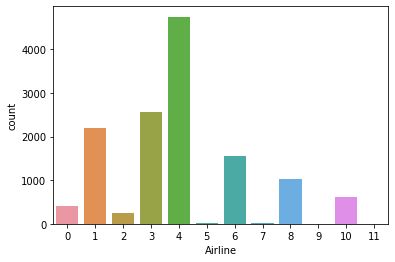

In [61]:
sns.countplot(df['Airline'])

In [62]:
df.Source

0       0
1       3
2       2
3       3
4       0
       ..
2666    3
2667    3
2668    2
2669    2
2670    2
Name: Source, Length: 13354, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


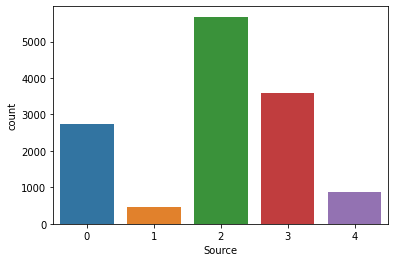

In [63]:
sns.countplot(df['Source'])


In [64]:
le.inverse_transform(df['Source'])

array(['1 Long layover', 'Business class', '2 Long layover', ...,
       '2 Long layover', '2 Long layover', '2 Long layover'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


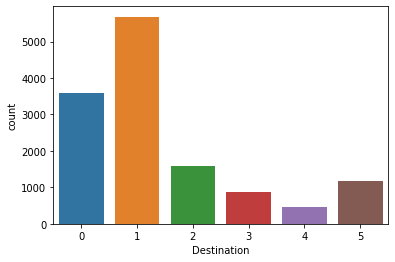

In [65]:
sns.countplot(df.Destination)

In [66]:
df['Total_Stops']= df['Total_Stops'].astype('float')

In [67]:
df.Total_Stops.dtype

dtype('float64')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


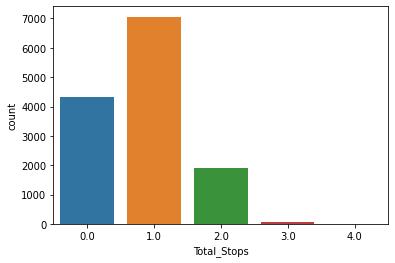

In [68]:
sns.countplot(df.Total_Stops)


In [69]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Total_Stops', 'Additional_Info', 'Price', 'Date', 'Month', 'Year',
       'Hours', 'Route_occurance', 'Hours', 'Minutes'],
      dtype='object')

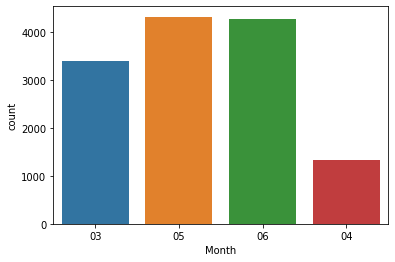

In [70]:
sns.countplot(data=df,x='Month')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  int64  
 1   Source           13354 non-null  int64  
 2   Destination      13354 non-null  int64  
 3   Route            13354 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Total_Stops      13354 non-null  float64
 7   Additional_Info  13354 non-null  int64  
 8   Price            13354 non-null  object 
 9   Date             13354 non-null  object 
 10  Month            13354 non-null  object 
 11  Year             13354 non-null  object 
 12  Hours            13354 non-null  object 
 13  Route_occurance  0 non-null      float64
 14  Hours            13354 non-null  object 
 15  Minutes          13352 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 2.2+ MB


In [78]:
df.Hours

,Hours,Hours
0,2,2
1,7,7
2,19,19
3,5,5
4,4,4
...,...,...
2666,23,23
2667,2,2
2668,6,6
2669,15,15


In [86]:
k = df.Hours.iloc[:,1]

In [87]:
k

0        2
1        7
2       19
3        5
4        4
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Hours, Length: 13354, dtype: object

In [89]:
df.drop('Hours',axis=1,inplace=True)

In [91]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Route_occurance,Minutes
0,3,0,5,BLR → DEL,22:20,01:10 22 Mar,0.0,7,3897.0,24,03,2019,NaN,50m
1,1,3,0,CCU → IXR → BBI → BLR,05:50,13:15,2.0,7,7662.0,1,05,2019,NaN,25m


In [94]:
df = pd.concat([df,k],axis=1)

In [95]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Route_occurance,Minutes,Hours
0,3,0,5,BLR → DEL,22:20,01:10 22 Mar,0.0,7,3897.0,24,03,2019,NaN,50m,2
1,1,3,0,CCU → IXR → BBI → BLR,05:50,13:15,2.0,7,7662.0,1,05,2019,NaN,25m,7
